In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 1: Regular Decision Tree Model

In [3]:
# Initialize and train the regular Decision Tree
dt_regular = DecisionTreeClassifier(random_state=42)
dt_regular.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [4]:
# Make predictions and evaluate the regular Decision Tree
y_pred_regular = dt_regular.predict(X_test)
accuracy_regular = accuracy_score(y_test, y_pred_regular)
print(f'Regular Decision Tree Accuracy: {accuracy_regular:.4f}')

Regular Decision Tree Accuracy: 1.0000


### Step 2: Pruned Decision Tree Model

In [5]:
# To implement pruning, we'll use the ccp_alpha parameter of DecisionTreeClassifier,
# which is used for cost complexity pruning. A higher value of ccp_alpha will prune more aggressively.

# Determine the optimal ccp_alpha value
path = dt_regular.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train a Decision Tree for each ccp_alpha, excluding the maximum value which prunes all leaves
dt_pruned_list = [DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha).fit(X_train, y_train) for ccp_alpha in ccp_alphas[:-1]]

# Find the alpha that maximizes test accuracy
test_accuracies = [accuracy_score(y_test, dt.predict(X_test)) for dt in dt_pruned_list]
best_alpha = ccp_alphas[test_accuracies.index(max(test_accuracies))]

In [12]:
print(f'best_alpha: {best_alpha}')

best_alpha: 0.0


In [7]:
# Train the pruned Decision Tree with the optimal ccp_alpha
dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
dt_pruned.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
# Make predictions and evaluate the pruned Decision Tree
y_pred_pruned = dt_pruned.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print(f'Pruned Decision Tree Accuracy: {accuracy_pruned:.4f}')

Pruned Decision Tree Accuracy: 1.0000



Seems like both the regular and pruned Decision Tree models have an accuracy of 1.0, and best_alpha was determined to be 0.0, which indicates that pruning was not applied in a way that altered the model.

This could happen for a few reasons:

* **Overfitting Not Present**: The dataset might be simple enough that the Decision Tree perfectly classifies the training data without overfitting. In such cases, pruning won't have any effect because the model's complexity is appropriate for the data's complexity.

* **Dataset Characteristics**: The Iris dataset is relatively small and not very complex, which might not be the best choice for demonstrating the effects of pruning. Pruning is more noticeable in scenarios where the Decision Tree is prone to overfitting due to a large number of features, complex decision boundaries, or noisy data.

* **Pruning Parameters**: The cost complexity pruning parameter ccp_alpha with a value of 0.0 means no pruning is done beyond what's required to build a minimal tree. The process of selecting best_alpha might not have found a value that led to significant pruning, possibly because none of the ccp_alpha values tested resulted in a better-performing tree on the validation set.


Let's first try a more complex or larger dataset — with more features, more instances, or more noise — where overfitting is more likely: to better demonstrate the effects of pruning

### Attempt #2 with a more complex dataset

In [13]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [15]:
# Load the wine dataset
wine = load_wine()
X_w, y_w = wine.data, wine.target

# Split the data into training and testing sets
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_w, y_w, test_size=0.3, random_state=42)

In [16]:
# Train a Regular Decision Tree

# Initialize and train the regular Decision Tree
dt_regular_new = DecisionTreeClassifier(random_state=42)
dt_regular_new.fit(X_train_w, y_train_w)

# Make predictions and evaluate the regular Decision Tree
y_pred_regular_new = dt_regular_new.predict(X_test_w)
accuracy_regular_new = accuracy_score(y_test_w, y_pred_regular_new)
print(f'Regular Decision Tree Accuracy: {accuracy_regular_new:.4f}')


Regular Decision Tree Accuracy: 0.9630


In [18]:
# Apply Pruning to the Decision Tree

# Determine the optimal ccp_alpha value
path_new = dt_regular_new.cost_complexity_pruning_path(X_train_w, y_train_w)
ccp_alphas_new, impurities_new = path_new.ccp_alphas, path_new.impurities

# Exclude the maximum alpha value to avoid the trivial tree with only one node
ccp_alphas_new = ccp_alphas_new[:-1]

# Train a Decision Tree for each ccp_alpha
dt_pruned_new_list = [DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha).fit(X_train_w, y_train_w) for ccp_alpha in ccp_alphas_new]

# Find the alpha that maximizes test accuracy
test_accuracies_new = [accuracy_score(y_test_w, dt.predict(X_test_w)) for dt in dt_pruned_new_list]
best_alpha_new = ccp_alphas_new[test_accuracies_new.index(max(test_accuracies_new))]


In [19]:
# Train the pruned Decision Tree with the optimal ccp_alpha
dt_pruned_new = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha_new)
dt_pruned_new.fit(X_train_w, y_train_w)

# Make predictions and evaluate the pruned Decision Tree
y_pred_pruned_new = dt_pruned_new.predict(X_test_w)
accuracy_pruned_new = accuracy_score(y_test_w, y_pred_pruned_new)
print(f'Pruned Decision Tree Accuracy: {accuracy_pruned_new:.4f}')
print(f'Best ccp_alpha: {best_alpha_new}')

Pruned Decision Tree Accuracy: 0.9630
Best ccp_alpha: 0.0


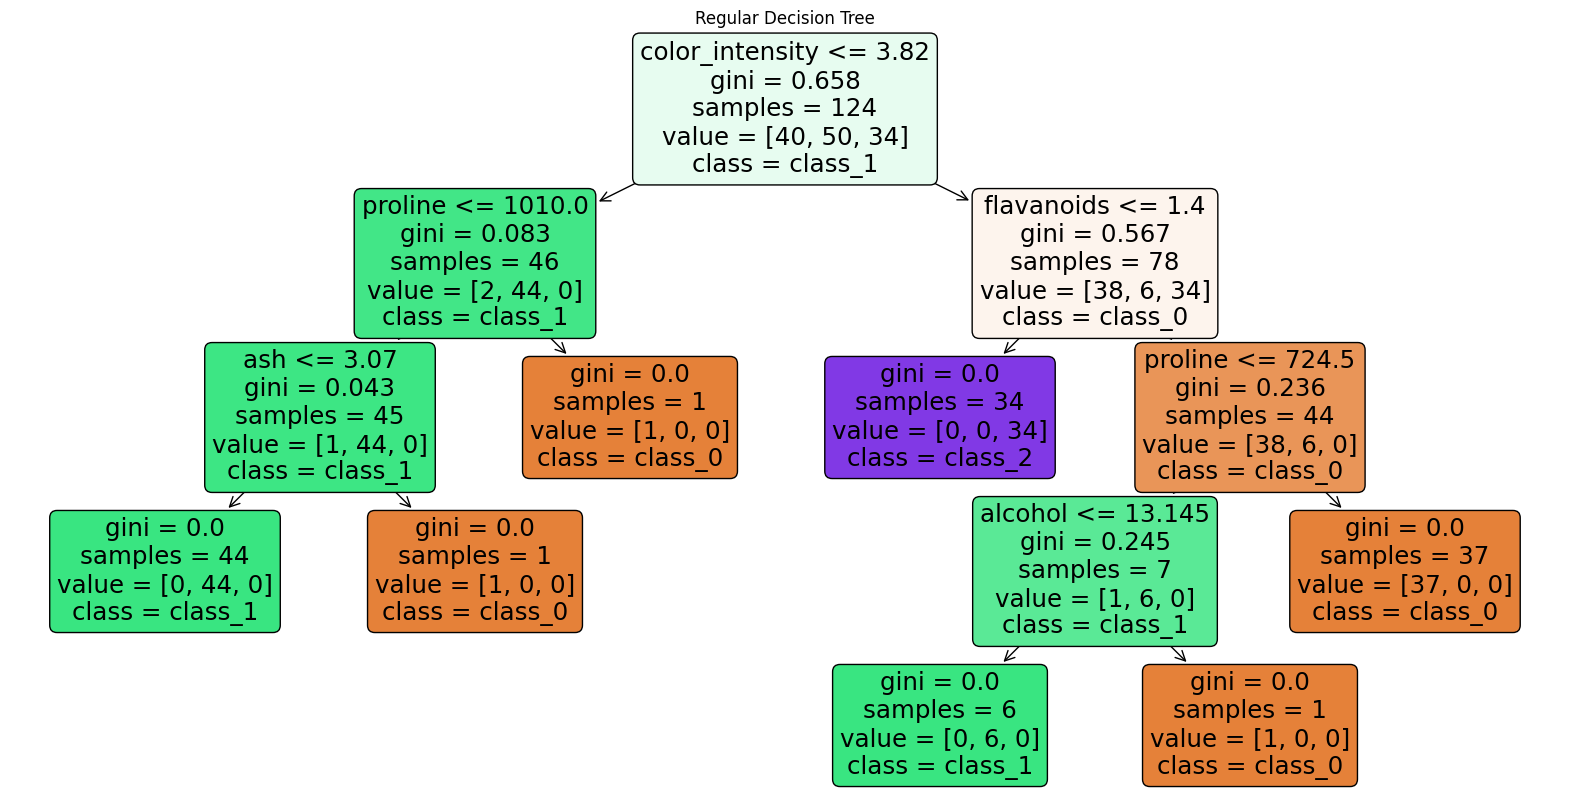

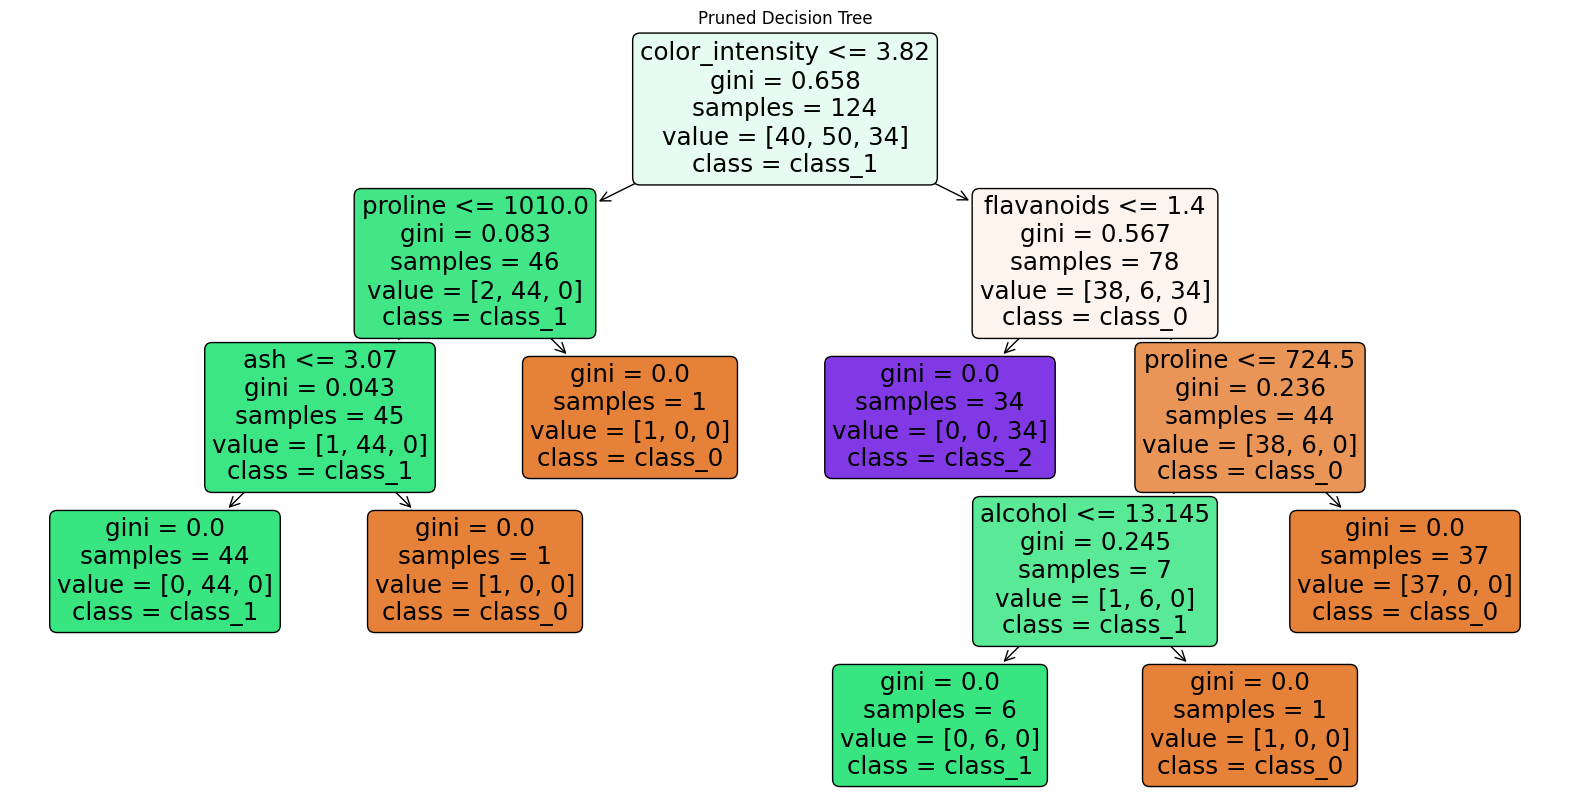

In [20]:
# Visualize the Trees

plt.figure(figsize=(20, 10))
plot_tree(dt_regular_new, filled=True, rounded=True, class_names=wine.target_names, feature_names=wine.feature_names)
plt.title('Regular Decision Tree')
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(dt_pruned_new, filled=True, rounded=True, class_names=wine.target_names, feature_names=wine.feature_names)
plt.title('Pruned Decision Tree')
plt.show()